##Clustering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TFM/Dataset y archivos iniciales/datasetSeleccionadasPreClustering.csv', decimal='.')

               team    passes     shots  shots_on_target  possession  \
1           arsenal  0.457862  0.386585         0.335111    0.622138   
10          chelsea  0.451794  0.432359         0.347445    0.612776   
16     leeds united  0.426538  0.381154         0.338077    0.660385   
18        liverpool  0.461695  0.436609         0.363120    0.631720   
19  manchester city  0.520221  0.461127         0.382132    0.680245   

    clearances   tackles       win      draw  win_percentage  cluster  \
1     0.272531  0.352187  0.528256  0.228501        0.528256        0   
10    0.258084  0.364177  0.562654  0.221130        0.562654        0   
16    0.175769  0.381923  0.423077  0.076923        0.423077        0   
18    0.270786  0.386216  0.547912  0.233415        0.547912        0   
19    0.255490  0.339559  0.674020  0.161765        0.674020        0   

      Estilo de juego  
1   Juego de posesión  
10  Juego de posesión  
16  Juego de posesión  
18  Juego de posesión  
19  Jueg

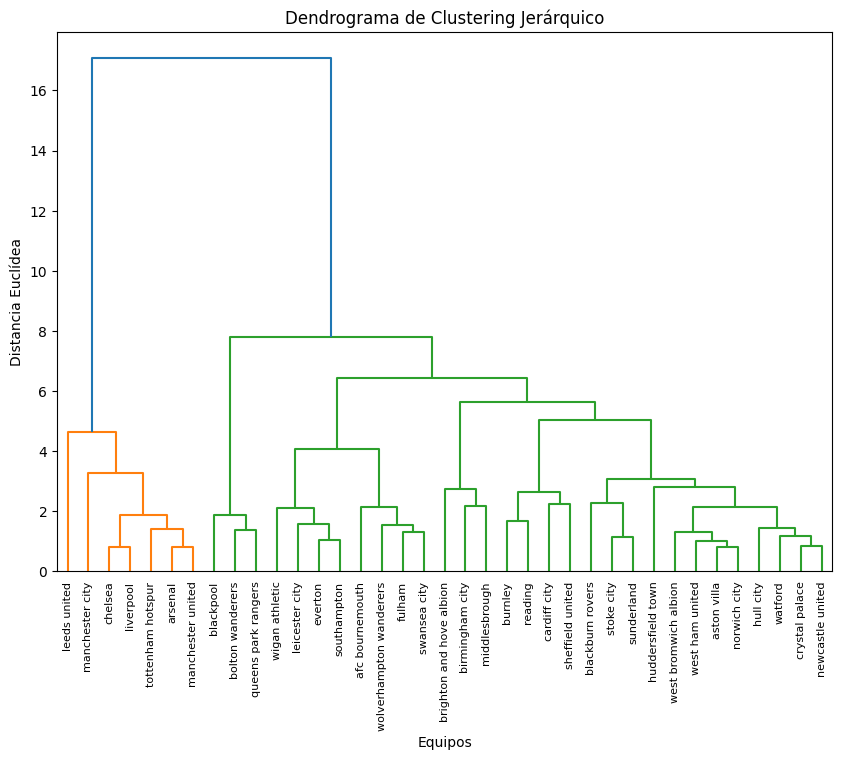

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

df[['home_goals', 'away_goals']] = df['result_full'].str.split('-', expand=True).astype(int)
df['home_goals_conceded'] = df['away_goals']
df['away_goals_conceded'] = df['home_goals']
df['home_goals_scored'] = df['home_goals']
df['away_goals_scored'] = df['away_goals']

# Calcular victorias, empates y derrotas locales y visitantes
df['home_win'] = np.where(df['home_goals'] > df['away_goals'], 1, 0)
df['away_win'] = np.where(df['away_goals'] > df['home_goals'], 1, 0)
df['draw'] = np.where(df['home_goals'] == df['away_goals'], 1, 0)

# Métricas más relevantes para locales y visitantes
metrics_home = [
    'home_passes', 'home_shots', 'home_shots_on_target', 'home_possession',
    'home_clearances', 'home_tackles'
]
metrics_away = [
    'away_passes', 'away_shots', 'away_shots_on_target', 'away_possession',
    'away_clearances', 'away_tackles'
]


df_home = df[['home_team'] + metrics_home + ['home_win', 'draw']].rename(columns=lambda x: x.replace('home_', ''))
df_away = df[['away_team'] + metrics_away + ['away_win', 'draw']].rename(columns=lambda x: x.replace('away_', ''))
df_home = df_home.rename(columns={'home_team': 'team', 'home_win': 'win'})
df_away = df_away.rename(columns={'away_team': 'team', 'away_win': 'win'})

# Combinar datos de locales y visitantes
df_combined = pd.concat([df_home, df_away])

# Agrupar por equipo y calcular la media de las métricas seleccionadas
grouped_metrics = df_combined.groupby('team').mean().reset_index()

# Porcentaje de victorias
total_matches = df_combined.groupby('team').size()
total_wins = df_combined.groupby('team')['win'].sum()
grouped_metrics['win_percentage'] = (total_wins / total_matches).values

scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(grouped_metrics.iloc[:, 1:-1])

# Añadir las etiquetas de los clusters
grouped_metrics['cluster'] = -1

def determine_style(row):
    if row['possession'] > 0.55 and row['passes'] > 0.35:
        return 0  # Juego de posesión
    elif row['shots'] > 0.30 and row['shots_on_target'] > 0.20:
        return 1  # Juego directo
    else:
        return 2  # Juego defensivo

grouped_metrics['cluster'] = grouped_metrics.apply(determine_style, axis=1)

def assign_style_name(cluster):
    if cluster == 0:
        return "Juego de posesión"
    elif cluster == 1:
        return "Juego directo"
    elif cluster == 2:
        return "Juego defensivo"

grouped_metrics['Estilo de juego'] = grouped_metrics['cluster'].apply(assign_style_name)

# Ordenar el DataFrame por clusters y por estilo de juego
grouped_metrics_sorted = grouped_metrics.sort_values(by=['cluster', 'Estilo de juego'], ascending=[True, True])

output_path = '/content/drive/MyDrive/TFM/6. Comparación estilos de juego/resultados_clustering_jerarquico_refinado_porcentaje.csv'
grouped_metrics_sorted.to_csv(output_path, index=False)

print(grouped_metrics_sorted.head())

Z = linkage(normalized_metrics, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=grouped_metrics['team'].values, leaf_rotation=90)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Equipos')
plt.ylabel('Distancia Euclídea')
plt.show()


              team    passes     shots  shots_on_target  possession  \
0          arsenal  0.457862  0.386585         0.335111    0.622138   
1          chelsea  0.451794  0.432359         0.347445    0.612776   
2     leeds united  0.426538  0.381154         0.338077    0.660385   
3        liverpool  0.461695  0.436609         0.363120    0.631720   
4  manchester city  0.520221  0.461127         0.382132    0.680245   

   clearances   tackles       win      draw  win_percentage  cluster  \
0    0.272531  0.352187  0.528256  0.228501        0.528256        0   
1    0.258084  0.364177  0.562654  0.221130        0.562654        0   
2    0.175769  0.381923  0.423077  0.076923        0.423077        0   
3    0.270786  0.386216  0.547912  0.233415        0.547912        0   
4    0.255490  0.339559  0.674020  0.161765        0.674020        0   

     Estilo_de_juego  valor_mercado_avg  dispersion_index  
0  Juego de posesión             487.64          0.260987  
1  Juego de posesión

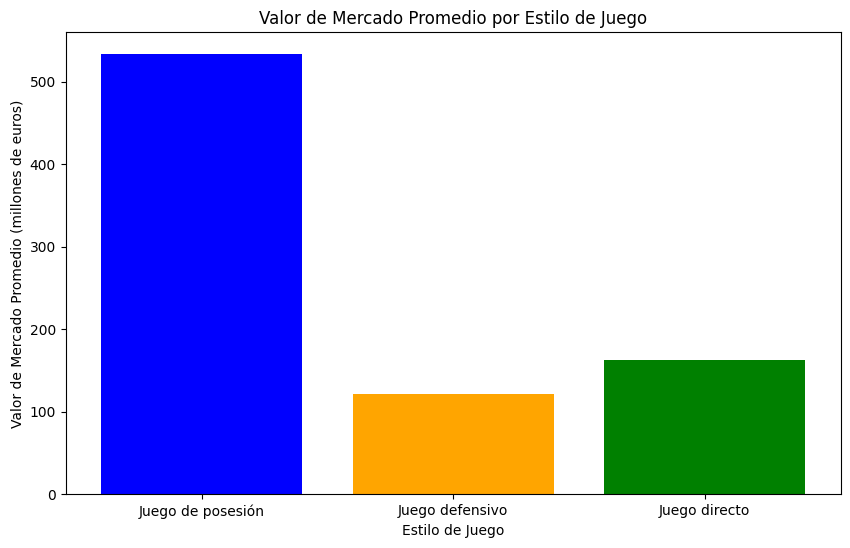

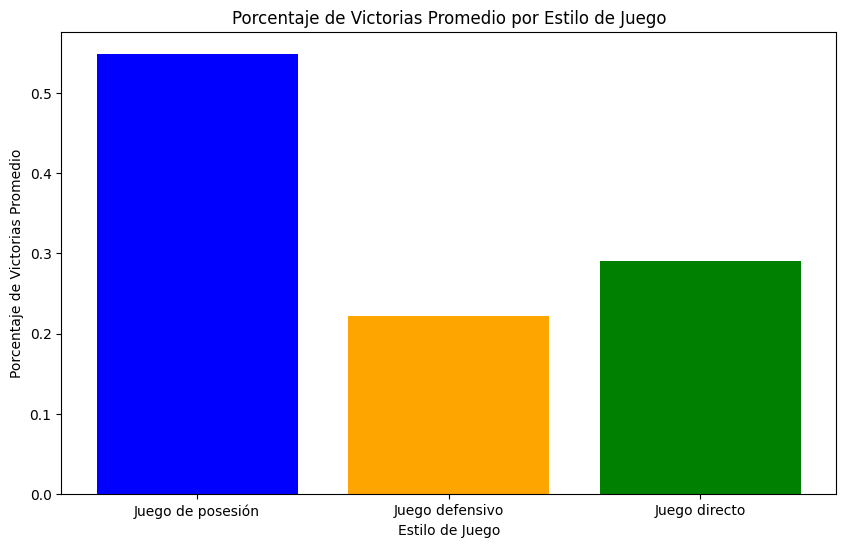

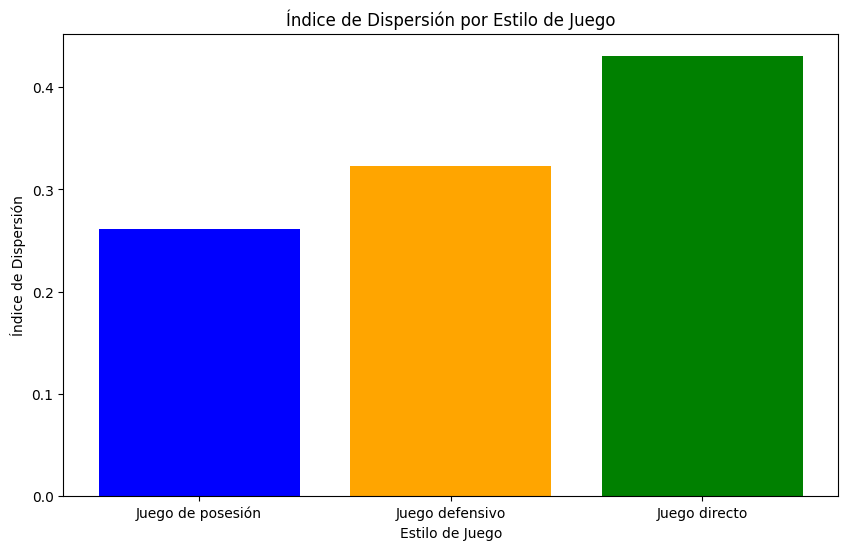

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Archivo con los valores de mercado de los equipos
valor_mercado_file_path = '/content/drive/MyDrive/TFM/8. Presupuesto equipos/teams_per_season_valor_mercado_avg_sorted.csv'
valor_mercado_df = pd.read_csv(valor_mercado_file_path)

# Archivo con los resultados del clustering
resultados_clustering_file_path = '/content/drive/MyDrive/TFM/6. Comparación estilos de juego/resultados_clustering_jerarquico_refinado_porcentaje.csv'
resultados_clustering_df = pd.read_csv(resultados_clustering_file_path)

resultados_clustering_df = resultados_clustering_df.rename(columns={'Estilo de juego': 'Estilo_de_juego'})

# Añadir el valor de mercado medio al DataFrame de resultados de clustering
resultados_clustering_df = pd.merge(resultados_clustering_df, valor_mercado_df, left_on='team', right_on='team', how='left')

# Indice de dispersión
resultados_clustering_df['dispersion_index'] = resultados_clustering_df.groupby('Estilo_de_juego')['valor_mercado_avg'].transform(lambda x: np.std(x) / np.mean(x))

output_path = '/content/drive/MyDrive/TFM/6. Comparación estilos de juego/resultados_clustering_jerarquico_refinado_porcentaje_con_valor_mercado.csv'
resultados_clustering_df.to_csv(output_path, index=False)

print(resultados_clustering_df.head())
print(resultados_clustering_df.columns)

# Agrupar los equipos según su estilo de juego y calcular el valor de mercado promedio para cada grupo
grouped_by_style = resultados_clustering_df.groupby('Estilo_de_juego').agg(
    valor_mercado_avg=pd.NamedAgg(column='valor_mercado_avg', aggfunc='mean'),
    win_percentage_avg=pd.NamedAgg(column='win_percentage', aggfunc='mean'),
    dispersion_index=pd.NamedAgg(column='dispersion_index', aggfunc='mean'),
    count=pd.NamedAgg(column='team', aggfunc='count')
).reset_index()

print(grouped_by_style)

# ANOVA (para ver si el estilo de juego afecta al valor de mercado)
anova_model = ols('valor_mercado_avg ~ C(Estilo_de_juego)', data=resultados_clustering_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

print("Métricas agrupadas por estilo de juego:")
print(grouped_by_style)

# Visualizar el impacto del valor de mercado en los estilos de juego
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_style['Estilo_de_juego'], grouped_by_style['valor_mercado_avg'], color=['blue', 'orange', 'green'])
plt.xlabel('Estilo de Juego')
plt.ylabel('Valor de Mercado Promedio (millones de euros)')
plt.title('Valor de Mercado Promedio por Estilo de Juego')
plt.show()

# Visualizar el rendimiento promedio por estilo de juego
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_style['Estilo_de_juego'], grouped_by_style['win_percentage_avg'], color=['blue', 'orange', 'green'])
plt.xlabel('Estilo de Juego')
plt.ylabel('Porcentaje de Victorias Promedio')
plt.title('Porcentaje de Victorias Promedio por Estilo de Juego')
plt.show()

# Visualizar el índice de dispersión por estilo de juego
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_style['Estilo_de_juego'], grouped_by_style['dispersion_index'], color=['blue', 'orange', 'green'])
plt.xlabel('Estilo de Juego')
plt.ylabel('Índice de Dispersión')
plt.title('Índice de Dispersión por Estilo de Juego')
plt.show()
